In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
from ipywidgets import interact, IntSlider, BoundedIntText,\
Text, link, jslink, ToggleButtons, BoundedIntText, BoundedFloatText
from IPython.display import display
from scipy.interpolate import interp1d
import seaborn as sns

In [ ]:
def polarizationSimplified(pi: list, y: list) -> float:
    ans = 0
    a = 1.6
    for i in range(len(pi)):
        for j in range(len(pi)):
            ans += ((pi[i]**(1+a)) * pi[j]) * abs(y[i] - y[j])
    return ans

def getFrequency(l: list) -> dict:
    ans = {}
    for e in l:
        if e not in ans:
            ans[e] = 1
        else:
            ans[e] += 1
    return ans

def getRelativeFrequency(l: list) -> dict:
    freq = getFrequency(l)
    N = len(l)
    ans = {}
    for k in freq:
        ans[k] = freq[k]/N
    return ans

def dictToLists(d: dict) -> list:
    keys = []
    values = []
    for k in d:
        keys.append(k)
        values.append(d[k])
    return keys, values


# Test 0

In [ ]:
def spreadMeasure(l: list) -> float:
    return max(l) - min(l)

def bimodalPlot(l, r, ld, rd):
    #x = np.arange(0, 1, delta)
    #y = np.zeros(N)

    #y[l] += lf
    #y[r] += rf
    #print("l[{:.2f}] = {:.2f}\nr[{:.2f}] = {:.2f}".format(x[l], y[l], x[r], y[r]))

    #plt.grid(color='black', linestyle='-', linewidth=1, alpha=0.15)
    #plt.stem(x, y, basefmt='C0 ', markerfmt='C0 ', linefmt='C4-', use_line_collection=True)
    #ax = plt.gca()
    #ax.set_xlim([-delta, delta*N])
    #ax.set_ylim([0, 20])

    data = []
    for _ in range(l):
        data.append(ld)
    for _ in range(r):
        data.append(rd)

    sns.set_style('whitegrid')
    sns.kdeplot(np.array(data), bw_adjust=0.7)
    #plt.hist(data)
    plt.xlim(-10, 110)
    print(data)
    print("Spread =",spreadMeasure(data))
    print("Dispersion =", np.std(data))
    plt.show()

interact(bimodalPlot,
         l=IntSlider(min=1, max=100, step=1, value=10, description='L-Amount'),
         r=IntSlider(min=1, max=100, step=1, value=10, description='R-Amount'),
         ld=IntSlider(min=0, max=100, step=1, value=10, description='L-Number'),
         rd=IntSlider(min=0, max=100, step=1, value=90, description='R-Number'))

interactive(children=(IntSlider(value=10, description='L-Amount', min=1), IntSlider(value=10, description='R-A…

<function __main__.bimodalPlot(l, r, ld, rd)>

## Polarization type 1: Spread
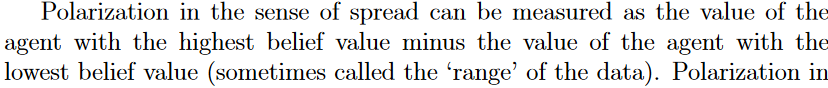

In [ ]:


def bimodalPlot(l, r, ld, rd):

    data = []
    for _ in range(l):
        data.append(ld)
    for _ in range(r):
        data.append(rd)

    sns.set_style('whitegrid')
    sns.kdeplot(np.array(data), bw_adjust=1)
    plt.xlim(-10, 110)
    #print(data)
    plt.text(50, 0, str(spreadMeasure(data)), fontsize=20,
             horizontalalignment='center',
             color='black',
             bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))
    plt.title("Spread")
    plt.show()

interact(bimodalPlot,
         l=IntSlider(min=1, max=100, step=1, value=10, description='L-Amount'),
         r=IntSlider(min=1, max=100, step=1, value=10, description='R-Amount'),
         ld=IntSlider(min=0, max=100, step=1, value=0, description='L-Number'),
         rd=IntSlider(min=0, max=100, step=1, value=100, description='R-Number'))

interactive(children=(IntSlider(value=10, description='L-Amount', min=1), IntSlider(value=10, description='R-A…

<function __main__.bimodalPlot(l, r, ld, rd)>

## Polarization type 2: Dispersion

## Polarization type 3: Coverage

# Test 1

https://seaborn.pydata.org/tutorial/distributions.html#tutorial-kde

In [ ]:
#data = [0, 0, 0, 0, 0, 10, 10, 10, 10, 10]

data = []

def getData(N):
    global data
    data = np.random.randint(1, 11, size=N)

def processData(relative: str, bw: float) -> None:

    if relative == "True":
        freq = getRelativeFrequency(data)
        x, y = dictToLists(freq)
        sns.set_style('whitegrid')
        sns.kdeplot(x, weights=y, bw_adjust=bw, cut=0)
    else:
        freq = getFrequency(data)
        x, y = dictToLists(freq)

    plt.bar(x, y, alpha=0.4, color='red')
    plt.show()

    print("Polarization =", polarizationSimplified(x, y))
    print(dict(sorted(freq.items())))

interact(getData,
         N=BoundedIntText(min=10, max=1000, step=10, value=10))
interact(processData,
    bw=BoundedFloatText(min=0.05, max=2.0, step=0.05, value=0.5, description='Bandwidth'),
    relative=ToggleButtons(
    options=['True', 'False'],
    value='True',
    description='Relative:'))


interactive(children=(BoundedIntText(value=10, description='N', max=1000, min=10, step=10), Output()), _dom_cl…

interactive(children=(ToggleButtons(description='Relative:', options=('True', 'False'), value='True'), Bounded…

<function __main__.processData(relative: str, bw: float) -> None>

## Polarization type 1: Spread
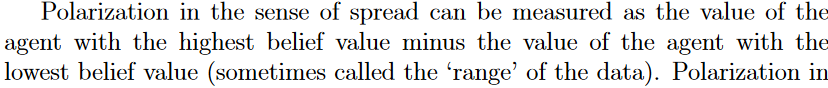

In [ ]:
data = []

def getData(N):
    global data
    data = np.random.randint(1, 11, size=N)

def processData(relative: str, bw: float) -> None:

    if relative == "True":
        freq = getRelativeFrequency(data)
        x, y = dictToLists(freq)
        sns.set_style('whitegrid')
        sns.kdeplot(np.array(data), bw_adjust=bw, cut=0)
    else:
        freq = getFrequency(data)
        x, y = dictToLists(freq)

    plt.bar(x, y, alpha=0.4, color='red')
    plt.text((max(data)+min(data))/2, 0, str(spreadMeasure(data)), fontsize=20,
             horizontalalignment='center',
             color='black',
             bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   ))
    plt.title("Spread")
    plt.show()
    print(dict(sorted(freq.items())))

interact(getData,
         N=BoundedIntText(min=10, max=1000, step=10, value=10))
interact(processData,
    bw=BoundedFloatText(min=0.05, max=2.0, step=0.05, value=0.5, description='Bandwidth'),
    relative=ToggleButtons(
    options=['True', 'False'],
    value='True',
    description='Relative:'))



interactive(children=(BoundedIntText(value=10, description='N', max=1000, min=10, step=10), Output()), _dom_cl…

interactive(children=(ToggleButtons(description='Relative:', options=('True', 'False'), value='True'), Bounded…

<function __main__.processData(relative: str, bw: float) -> None>

# Test 2

`FREQ[I]` indica el número de personas que comparten la postura `VALUES[i]`

In [ ]:
from ipywidgets import BoundedIntText, Tab, IntText, link, interact
from IPython.display import display
from matplotlib import pyplot as plt
from numpy import arange
from statsmodels.stats.weightstats import DescrStatsW


GROUPS = 10

VALUES = arange( 0.5, 10, 1.0 )
FREQS = [ 0 ] * GROUPS

def f( g, f ):
  global VALUES
  global FREQS

  FREQS[ g ] = f
#  OBS = []
#  for i in range( GROUPS ):
#    OBS += [ i + 1 ] * FREQS[ i ]

  plt.hist( VALUES, bins = range( GROUPS + 1 ), weights = FREQS )

#  print( range( 1, GROUPS + 1 ) )
#  print( FREQS )

  M = DescrStatsW( VALUES, weights = FREQS )
  if( sum( FREQS ) > 0 ):
    print( "MEAN =", M.mean )
    print( "SD =", M.std )
    print( "VAR =", M.var)
#    print( "MEAN =", average( range( 1, GROUPS + 1 ), weights = FREQS ) )
  else:
    print( "MEAN = UNDIFINED" )
    print( "SD = UNIDEFINED" )
  #print(VALUES, FREQS)
  print("POLARIZATION =", polarizationSimplified(FREQS, VALUES))

interact( f, g = [ ( f"GROUP { i + 1 }", i ) for i in range( GROUPS ) ],\
         f = BoundedIntText( min = 0, description = "FREQ =" ) )

interactive(children=(Dropdown(description='g', options=(('GROUP 1', 0), ('GROUP 2', 1), ('GROUP 3', 2), ('GRO…

<function __main__.f(g, f)>